# Edge detection
Edge detection is considered to distinguish synthetic and natural images.
Natural images, which have greater sources of distortion and imperfect lighting, are expected to have a greater number of pixels detectable as edges.
This section will present the basic approach used including the training of models for hypothesis testing.
Subsequently the likelihood ratio test for image discrimination is presented and the correct classification rate is discussed.

## Approach
Gradient-based edge detection is used.
Pixels for which the gradient exceeds a fixed threshold are classified as edges.
The threshold is determined using a training set of 23 each synthetic and natural images.
The following figure shows normalized histograms of the pixel gradients across all images in the data sets.
Based on the histogram, a threshold value of 4 was chosen.
All pixels whose gradients exceed the threshold are classified as edges.

<img style="float: left;" src="img1.png">

The threshold is applied to the same training set.
For uniformity, each image is resized to $(540 \times 960)$ before it is processed, ensuring that differences in edge counts are not due to differences in size.
The number of edge pixels, as determined by the threshold on the gradient, is then totalled.
Applying this metric to the synthetic and natural images separately, a histogram for the number of edge pixels in the training images is obtained.
These histograms are shown in the following figure.

<img style="float: left;" src="img2.png">

The histograms are coarse because of the small size of the training sets.
However, they provide a means for determining a plausible probability density function (PDF) for the synthetic and natural image sets.
The histograms have very wide tails, so Cauchy distributions are fit to the data.
The Cauchy distributions for natural and synthetic images have the following parameters:

\begin{align}
\mathrm{scenes}: x_0 = 141500, \gamma = 40133.3 \\
\mathrm{synthetic}: x_0 = 35760.8, \gamma = 5377.61
\end{align}

Here, $x_0$ indicates the mean and $\gamma$ the scale parameter.
Having determined approximate distributions for the number of edges in the synthetic and natural images, it is a straightforward matter to apply a likelihood ratio test for a new candidate image to classify it as synthetic or natural.

## Likelihood ratio test and performance

The likelihood ratio test compares the lieklihood of the measured datum, $z$, for the two candidate hypothesis.
A Bayesian framework is incorporated, so we arbitrarily can choose "synthetic" as the null hypothesis and "natural" as the test hypothesis.
In the Bayesian framework, the likelihood ratio is as follows:

\begin{equation}
\frac{Pr(H_0)}{Pr(H_1)} \lessgtr \frac{p_0(z)}{p_1(z)}
\end{equation}

$Pr(H_i)$ indicates the probability of a hypothesis $H_i$ and $p_i(z)$ is the associated probability density function for the test statistic.
For simplicity, synthetic and natural images are treated as equally likely, so the likelihood ratio is compared to one.
The following figure shows the likelihood ratios for the synthetic and natural image sets.
The likelihood threshold based on the priors is plotted for comparison.
Clearly, the test is conservative with respect to synthetic images, and fails to detect all the natural scenes.
No doubt better performance could be obtained using larger training sets and a more refined edge detection scheme.

<img style="float: left;" src="img3.png">

Using equal priors, there are zero false positives out of ninety-nine synthetic images and eight false negatives out of fifty-six natural scenes.
This is a total error rate of just above 5% for the whole data set.
It should be noted that the test set includes the images used in training the statistics for the Cauchy distributions.

Cauchy distribution for scenes: loc=141499.950524, scale=40133.259281
Cauchy distribution for synthetic: loc=35760.832624, scale= 5377.609552


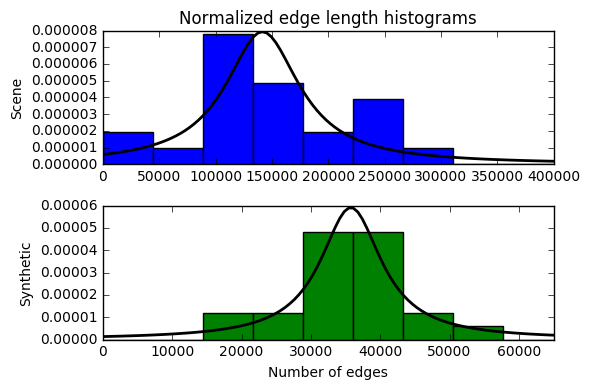

In [7]:
from loadImg import *
import matplotlib.pyplot as plt
from scipy import stats

TrainingSize = 23

def edgeLength():
    """
    Using a hard-coded threshold value, do edge detection. 
    Create normalized histograms for the training set of images.
    """

    thres = 4.0
    
    sz = [540,960]
    
    fig,ax = plt.subplots(2,1)
    
    valSynthetic = np.zeros((TrainingSize,))
    valScene = np.zeros((TrainingSize,))
    for h in range(TrainingSize):
        im = im2intensity(loadSynthetic(h+1,sz=sz))
        gra = np.gradient(im)[0]
        valSynthetic[h] = len(np.where(np.abs(gra) > thres)[0])
    for h in range(TrainingSize):        
        im = im2intensity(loadScene(h+1,sz=sz))
        gra = np.gradient(im)[0]
        valScene[h] = len(np.where(np.abs(gra) > thres)[0])
    
    scenefit = stats.cauchy.fit(valScene)
    syntheticfit = stats.cauchy.fit(valSynthetic)
    print("Cauchy distribution for scenes: loc=%12.6f, scale=%12.6f" % (scenefit[0],scenefit[1]))
    print("Cauchy distribution for synthetic: loc=%12.6f, scale=%12.6f" % (syntheticfit[0],syntheticfit[1]))
    
    bins = np.linspace(0.0,400000,10)
    barx = np.diff(bins)*0.5 + bins[:-1]
    binwidth = np.mean(np.diff(bins))
    xpdf = np.linspace(bins[0],bins[-1],100)
    barScene = np.histogram(valScene,bins,normed=True)[0]
    
    ax[0].bar(bins[:-1],barScene,width=binwidth,color='blue')
    #ax[0].hist(valScene,rwidth=1,normed=True)
    ax[0].plot(xpdf,stats.cauchy.pdf(xpdf,loc=scenefit[0],scale=scenefit[1]),'k-',linewidth=2)
    ax[0].set_xlim((bins[0],bins[-1]))
    ax[0].set_ylabel('Scene')
    ax[0].set_title('Normalized edge length histograms')
    plt.tight_layout()
    
    bins = np.linspace(0,65000,10)
    barx = np.diff(bins)*0.5 + bins[:-1]
    binwidth = np.mean(np.diff(bins))   
    xpdf = np.linspace(bins[0],bins[-1],100)
    barSynthetic = np.histogram(valSynthetic,bins,normed=True)[0]
    ax[1].bar(bins[:-1],barSynthetic,width=binwidth,color='green')
    ax[1].plot(xpdf,stats.cauchy.pdf(xpdf,loc=syntheticfit[0],scale=syntheticfit[1]),'k-',linewidth=2)
    ax[1].set_xlim((bins[0],bins[-1]))
    ax[1].set_xlabel('Number of edges')
    ax[1].set_ylabel('Synthetic')
    plt.tight_layout()
    
    plt.show()
    return

edgeLength()